1. Importing libraries
2. Importing data frames
3. Customer profile variable
4. Visualization of distribution of profilesAggregation of max, min, mean variables on usage frequency and expenditure based on customer profile
5. Exporting outputs
6. Final crosstab check

1. Importing libraries

In [5]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. Importing data frames

In [7]:
path = r'C:/Users/Alejandra/Documents/CF/Data Immersion/Achievement 4/06022025_Instacart Basket Analysis'

In [8]:
#Loading pickle files
df =pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'ord_prod_cust_final4.10.pkl'))

3. Customer profile variable

The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order_clean,product_id,product_name,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_avg,spender_type,user_frequency_median,user_frequency,gender,state,age,dependants,family_status,income,geo_region,activity_flag
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,Mid-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity
1,2539329,1,1,2,8,0.0,14084,Organic Unsweetened Vanilla Almond Milk,16,12.5,Mid-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity
2,2539329,1,1,2,8,0.0,12427,Original Beef Jerky,19,4.4,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity
3,2539329,1,1,2,8,0.0,26088,Aged White Cheddar Popcorn,19,4.7,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity
4,2539329,1,1,2,8,0.0,26405,XL Pick-A-Size Paper Towel Rolls,17,1.0,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity


Creating Variables

In [14]:
#Creating variable age group

In [15]:
#Applying loc
df.loc[(df['age']>=18)&(df['age']<=24), 'age_group'] = 'young adult'
df.loc[(df['age']>=25)&(df['age']<=34), 'age_group'] = 'young adult'
df.loc[(df['age']>=35)&(df['age']<=44), 'age_group'] = 'professional'
df.loc[(df['age']>=45)&(df['age']<=54), 'age_group'] = 'professional'
df.loc[(df['age']>=55)&(df['age']<=64), 'age_group'] = 'professional'
df.loc[(df['age']>=65)&(df['age']<=74), 'age_group'] = 'retiree'
df.loc[(df['age']>=75)&(df['age']<=81), 'age_group'] = 'retiree'


In [16]:
df['age_group'].value_counts(dropna=False)

age_group
professional    14150803
young adult      8030896
retiree          7989725
Name: count, dtype: int64

In [17]:
#Creating variable income group

In [18]:
#Applying loc
df.loc[(df['income']>=0)&(df['income']<=100000), 'income_category'] = 'low income'
df.loc[(df['income']>=100001)&(df['income']<=200000), 'income_category'] = 'middle income'
df.loc[(df['income']>=200001)&(df['income']<=300000), 'income_category'] = 'middle income'
df.loc[(df['income']>=300001)&(df['income']<=450000), 'income_category'] = 'high income'
df.loc[(df['income']>=450001), 'income_category'] = 'high income'

In [19]:
df['income_category'].value_counts(dropna=False)

income_category
low income       16307779
middle income    13764621
high income         99024
Name: count, dtype: int64

In [20]:
#Creating varialbe marital status 

In [21]:
#Applying loc
# Correcting the use of loc
df.loc[df['family_status'] == 'single', 'marital_status'] = 'single'
df.loc[df['family_status'] == 'divorced/widowed', 'marital_status'] = 'single'
df.loc[df['family_status'] == 'married', 'marital_status'] = 'married'
df.loc[df['family_status'] == 'living with parents and siblings', 'marital_status'] = 'single'

In [22]:
df['marital_status'].value_counts(dropna=False)

marital_status
married    21188130
single      8983294
Name: count, dtype: int64

In [23]:
#Creating variable family size 

In [24]:
df['dependants'].value_counts(dropna=False)

dependants
3    7576814
0    7539213
2    7531754
1    7523643
Name: count, dtype: int64

In [25]:
df.loc[df['dependants']==0, 'family_type'] = 'child-free'
df.loc[df['dependants']==1, 'family_type'] = 'parent'
df.loc[df['dependants']>=2, 'family_type'] = 'parent'

In [26]:
#Creating variable marital status

In [27]:
df['family_type'].value_counts(dropna=False)

family_type
parent        22632211
child-free     7539213
Name: count, dtype: int64

In [28]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order_clean,product_id,product_name,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_avg,spender_type,user_frequency_median,user_frequency,gender,state,age,dependants,family_status,income,geo_region,activity_flag,age_group,income_category,marital_status,family_type
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,Mid-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity,young adult,low income,married,parent
1,2539329,1,1,2,8,0.0,14084,Organic Unsweetened Vanilla Almond Milk,16,12.5,Mid-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity,young adult,low income,married,parent
2,2539329,1,1,2,8,0.0,12427,Original Beef Jerky,19,4.4,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity,young adult,low income,married,parent
3,2539329,1,1,2,8,0.0,26088,Aged White Cheddar Popcorn,19,4.7,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity,young adult,low income,married,parent
4,2539329,1,1,2,8,0.0,26405,XL Pick-A-Size Paper Towel Rolls,17,1.0,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity,young adult,low income,married,parent


In [29]:
#Concatenating variables
df['customer_profile'] = df['marital_status'] + ' , ' + df['age_group'] + ', ' + df['family_type'] + ' , ' + df['income_category'] 

In [30]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order_clean,product_id,product_name,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_avg,spender_type,user_frequency_median,user_frequency,gender,state,age,dependants,family_status,income,geo_region,activity_flag,age_group,income_category,marital_status,family_type,customer_profile
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,Mid-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity,young adult,low income,married,parent,"married , young adult, parent , low income"
1,2539329,1,1,2,8,0.0,14084,Organic Unsweetened Vanilla Almond Milk,16,12.5,Mid-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity,young adult,low income,married,parent,"married , young adult, parent , low income"
2,2539329,1,1,2,8,0.0,12427,Original Beef Jerky,19,4.4,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity,young adult,low income,married,parent,"married , young adult, parent , low income"
3,2539329,1,1,2,8,0.0,26088,Aged White Cheddar Popcorn,19,4.7,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity,young adult,low income,married,parent,"married , young adult, parent , low income"
4,2539329,1,1,2,8,0.0,26405,XL Pick-A-Size Paper Towel Rolls,17,1.0,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity,young adult,low income,married,parent,"married , young adult, parent , low income"


4. Visualization of distribution of profiles

Create an appropriate visualization to show the distribution of profiles.

In [33]:
#Creating product type preferences by customer marital status
customer_spending = df.groupby('marital_status')['department_id'].value_counts().unstack(fill_value=0)

Text(0.5, 0, 'Customer Status')

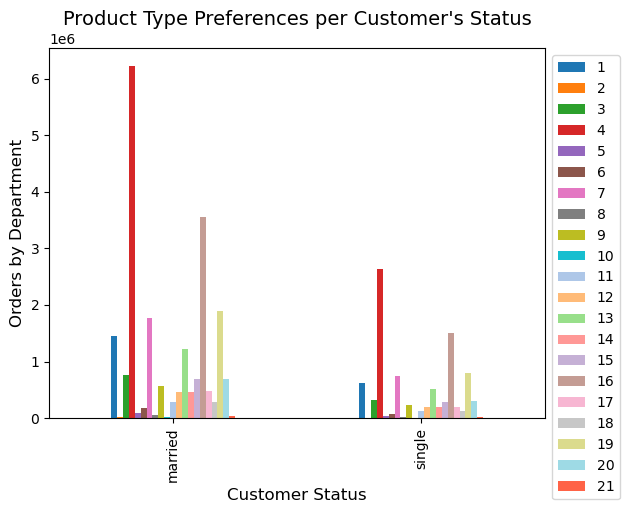

In [34]:
#Plotting the bar chart with colors
customer_spending_bar = customer_spending.plot.bar(color=[
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#ff6347"
])

#Moving the legend to the upper left outside the chart
customer_spending_bar.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

#Setting title and axis labels
customer_spending_bar.set_title("Product Type Preferences per Customer's Status", fontsize=14)
customer_spending_bar.set_ylabel("Orders by Department", fontsize=12)
customer_spending_bar.set_xlabel("Customer Status", fontsize=12)

Text(0.5, 0, 'Family Type')

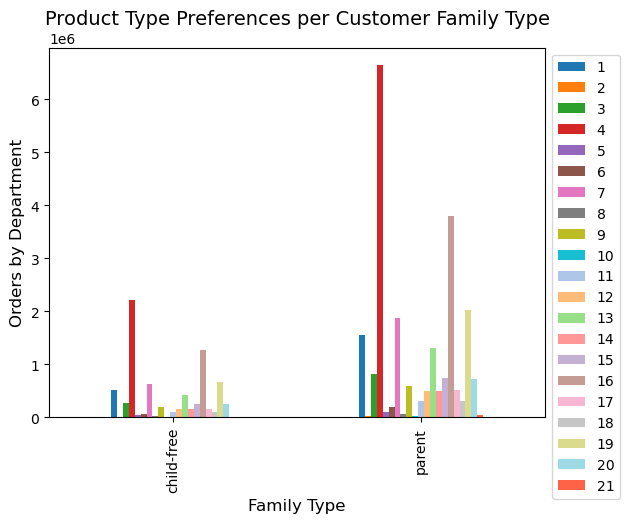

In [35]:
#Customer orders by family type
famtype_spending = df.groupby('family_type')['department_id'].value_counts().unstack(fill_value=0)
# Plotting the bar chart with colors
famtype_spending_bar = famtype_spending.plot.bar(color=[
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#ff6347"
])

# Moving the legend to the upper left outside the chart
famtype_spending_bar.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

# Setting title and axis labels
famtype_spending_bar.set_title("Product Type Preferences per Customer Family Type", fontsize=14)
famtype_spending_bar.set_ylabel("Orders by Department", fontsize=12)
famtype_spending_bar.set_xlabel("Family Type", fontsize=12)

In [36]:
#Customer orders by income group 
incomegroup_spending = df.groupby('income_category')['department_id'].value_counts().unstack(fill_value=0)

Text(0.5, 0, 'Customer Income Category')

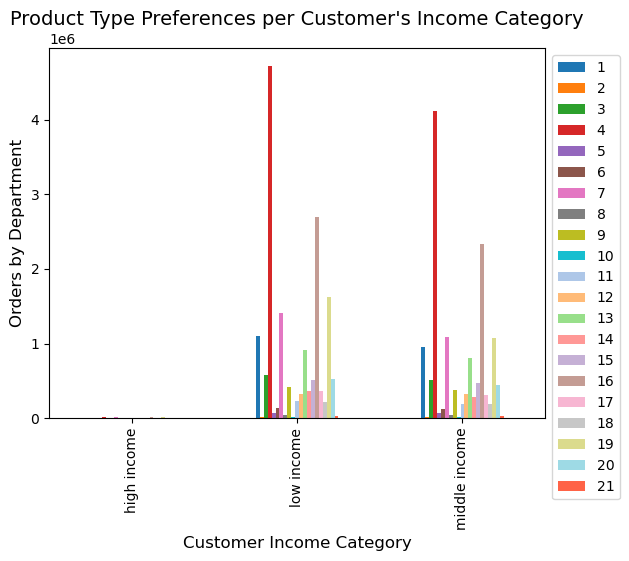

In [37]:
#Plotting the bar chart with colors
incomegroup_spending_bar = incomegroup_spending.plot.bar(color=[
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#ff6347"
])

#Moving the legend to the upper left outside the chart
incomegroup_spending_bar.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

#Setting title and axis labels
incomegroup_spending_bar.set_title("Product Type Preferences per Customer's Income Category", fontsize=14)
incomegroup_spending_bar.set_ylabel("Orders by Department", fontsize=12)
incomegroup_spending_bar.set_xlabel("Customer Income Category", fontsize=12)

Text(0.5, 0, 'Age Group')

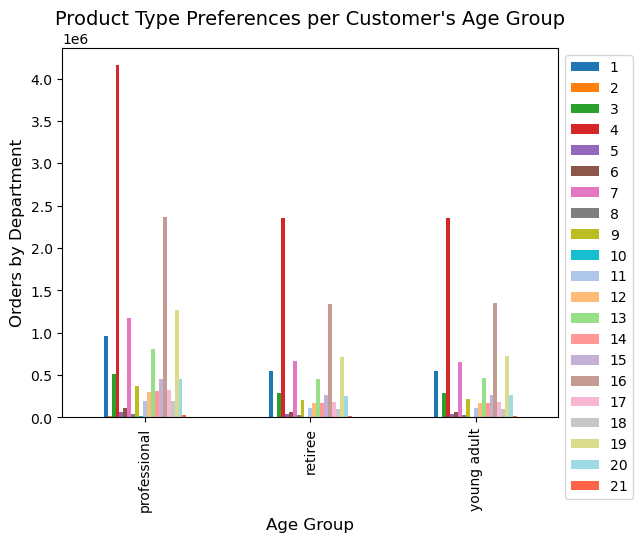

In [38]:
#Customer orders by age group 
agegroup_spending = df.groupby('age_group')['department_id'].value_counts().unstack(fill_value=0)
#Plotting the bar chart with colors
agegroup_spending_bar = agegroup_spending.plot.bar(color=[
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf",
    "#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5",
    "#c49c94", "#f7b6d2", "#c7c7c7", "#dbdb8d", "#9edae5",
    "#ff6347"
])

#Moving the legend to the upper left outside the chart
agegroup_spending_bar.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

#Setting title and axis labels
agegroup_spending_bar.set_title("Product Type Preferences per Customer's Age Group", fontsize=14)
agegroup_spending_bar.set_ylabel("Orders by Department", fontsize=12)
agegroup_spending_bar.set_xlabel("Age Group", fontsize=12)

Text(0, 0.5, 'Counts of Income Type')

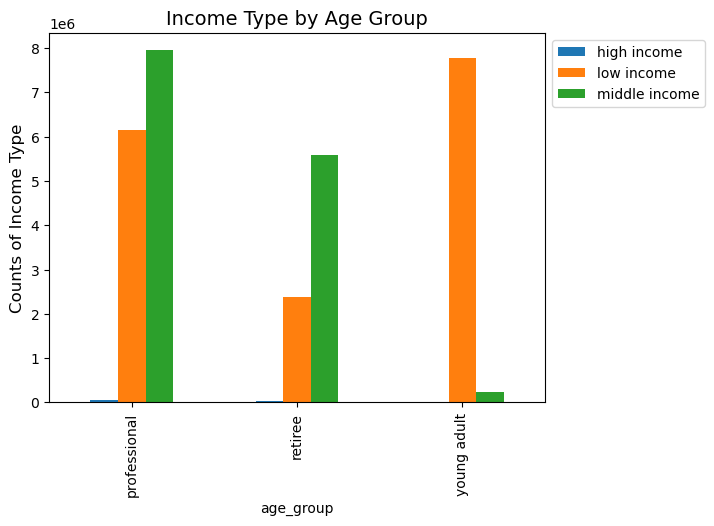

In [39]:
#Age group by income type
agegroup_income = df.groupby('age_group')['income_category'].value_counts().unstack(fill_value=0)

#Plotting the bar chart with colors
agegroup_income_bar = agegroup_income.plot.bar(color=[
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
    ])

#Moving the legend to the upper left outside the chart
agegroup_income_bar.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=10)

#Setting title and axis labels
agegroup_income_bar.set_title("Income Type by Age Group", fontsize=14)
agegroup_income_bar.set_ylabel("Counts of Income Type", fontsize=12)

Text(0.5, 1.0, 'Age Group Frequency')

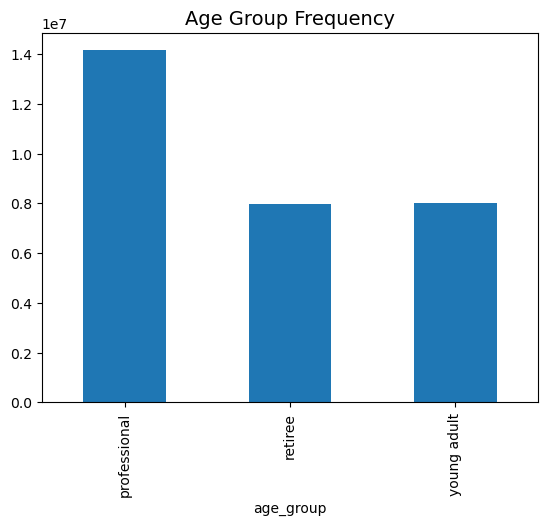

In [40]:
#Age group frequency
agegroup = df['age_group'].value_counts().sort_index()

#Ploting the bar chart with colors
agegroup_bar = agegroup.plot.bar()

#Setting title and axis labels
agegroup_bar.set_title("Age Group Frequency", fontsize=14)

5. Aggregation of max, min, mean variables on usage frequency and expenditure based on customer profile

Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.
Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

There are several identifiable relationships: To name a few: most of the customers are between low and middle income, the most reliable spenders are married customers with children between 35 and 55 years old. The department with most demand is #4, #16, and #9. Users are more frequent in the west, while they are more profitable in the south (they have a higher expenditure despite having some of the lowest usage numbers).   

In [44]:
#Grouping and and aggregating variables
df.groupby(['customer_profile', 'geo_region', 'department_id']).agg({
    'user_frequency_median': ['mean', 'min', 'max'],
    'spending_avg': ['mean', 'min', 'max']
}).reset_index()

customer_profile geo_region department_id  \
                                                                              
0     married , professional, parent , high income    Midwest             1   
1     married , professional, parent , high income    Midwest             2   
2     married , professional, parent , high income    Midwest             3   
3     married , professional, parent , high income    Midwest             4   
4     married , professional, parent , high income    Midwest             5   
...                                            ...        ...           ...   
1698  single , young adult, parent , middle income       West            17   
1699  single , young adult, parent , middle income       West            18   
1700  single , young adult, parent , middle income       West            19   
1701  single , young adult, parent , middle income       West            20   
1702  single , young adult, parent , middle income       West            21   

     user_frequency_median            spending_avg                           
                      mean  min   max         mean        min           max  
0                 8.527646  2.0  28.0   281.041321  37.826148   2571.269231  
1                 8.000000  7.0   9.0   218.506646  37.826148    399.187144  
2                 7.803209  2.0  28.0   288.757698  37.826148   2571.269231  
3                 8.651561  2.0  28.0   273.241197  37.826148   2571.269231  
4                 8.108696  2.0  23.0   147.062538  37.826148    778.746552  
...                    ...  ...   ...          ...        ...           ...  
1698             10.722359  3.0  30.0   121.137454   7.066071  10209.987755  
1699             13.172414  3.0  24.0    32.448810   7.222857    280.703782  
1700              9.814623  3.0  30.0    72.081831   7.066071   1323.994737  
1701             10.019824  3.0  30.0    56.267211   7.066071   1323.994737  
1702              9.058824  3.0  15.0   187.660458   7.471571    461.067421  

[1703 rows x 9 columns]

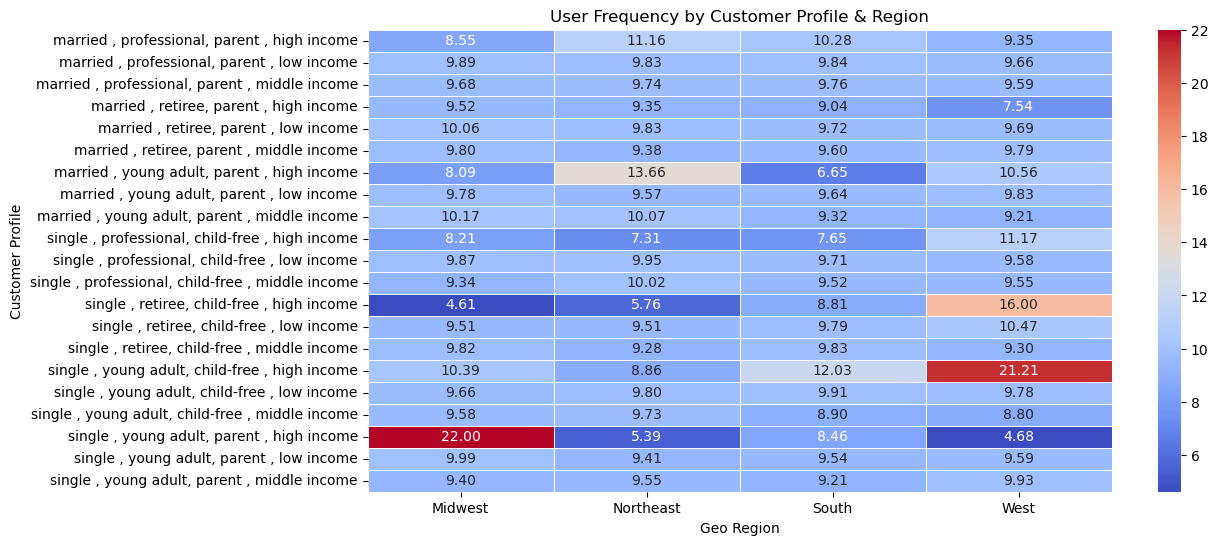

In [45]:
# Creating heatmap of user frequency by region
#Aggregating data
grouped_df = df.groupby(['customer_profile', 'geo_region']).agg({
    'user_frequency_median': 'mean'
}).reset_index()

#Pivot for heatmap
heatmap_freq_region = grouped_df.pivot(index='customer_profile', columns='geo_region', values='user_frequency_median')

#Plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_freq_region, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title('User Frequency by Customer Profile & Region')
plt.xlabel('Geo Region')
plt.ylabel('Customer Profile')
plt.savefig(r'C:\Users\Alejandra\Documents\CF\Data Immersion\Achievement 4\06022025_Instacart Basket Analysis\04_Analysis\Visualizations\4.10\user_freq_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

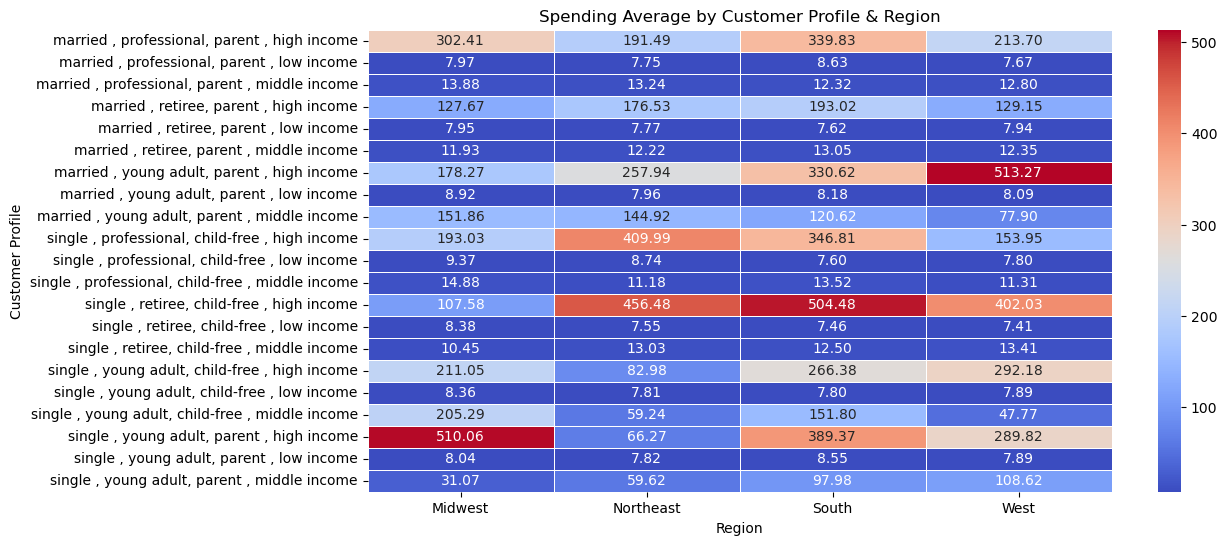

In [46]:
#Creating heatmap of spending average by region 
#Aggregate data
grouped_df = df.groupby(['customer_profile', 'geo_region']).agg({
    'spending_avg': 'mean'
}).reset_index()

#Pivot for heatmap
heatmap_spendavg_region = grouped_df.pivot(index='customer_profile', columns='geo_region', values='spending_avg')

#Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_spendavg_region, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title('Spending Average by Customer Profile & Region')
plt.xlabel('Region')
plt.ylabel('Customer Profile')
plt.savefig(r'C:\Users\Alejandra\Documents\CF\Data Immersion\Achievement 4\06022025_Instacart Basket Analysis\04_Analysis\Visualizations\4.10\spending_avg_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

7. Exporting outputs

In [100]:
#Export data to pkl
df.to_pickle(os.path.join(path, '02_Data','Prepared Data', 'ord_prod_cust_final_version.pkl'))

In [49]:
#Exporting Visualizations
famtype_spending_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', '4.10', 'Orders by Family Type.png'))

In [50]:
incomegroup_spending_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', '4.10', 'Orders by Income Group.png'))


In [51]:
agegroup_spending_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations','4.10', 'Orders by Age Group.png'))


In [52]:
agegroup_income_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations','4.10', 'Income by Age Group.png'))


8. Final crosstab check

In [54]:
crosstab = pd.crosstab(df['days_since_prior_order_clean'], df['order_number'], dropna = False)

In [55]:
crosstab

order_number,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
days_since_prior_order_clean,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,1502870,14952,15138,14414,14674,16046,14384,13890,12774,11460,11784,9828,9438,8960,8435,8130,7848,7749,7038,6902,7084,6424,6170,6103,6032,5541,6049,5569,5201,5685,4811,5133,4630,4535,4552,4384,4314,4093,3864,4029,4056,3825,3677,3670,3226,3519,3326,2720,3164,2634,2482,2928,2624,2522,2379,2483,2375,2221,2354,2196,2069,2247,1856,2031,1585,2127,1939,1871,1560,1672,1700,1573,1731,1555,1341,1537,1526,1422,1369,1184,1306,1196,1150,1490,1343,1358,1139,1177,1177,1195,1148,1040,937,1134,1099,1041,883,1037,935
1.0,0,26281,24703,24609,25559,25533,24996,22921,21783,21067,21260,19516,19108,18279,18544,18133,16765,15977,15509,15128,15183,13855,13619,13230,12861,13006,12938,11962,12525,12084,11751,11581,10867,10395,9694,9688,9760,9506,9562,9456,8645,8873,8713,8576,8441,8323,8482,8199,7711,7147,7715,6976,6525,7033,7112,6250,6438,6265,5896,5851,5598,5947,4935,5725,4852,4950,5263,4675,4568,4692,4123,4405,4222,4229,4013,3918,4106,3996,3596,4132,3518,3149,3458,3289,3245,3108,2970,2693,3027,2787,2801,2728,2605,2606,2639,2436,2535,2633,2363
2.0,0,38901,39530,40055,38964,40907,38101,37519,35745,33830,33364,31473,30602,30259,28626,27574,26687,26236,25612,23717,23529,23979,23049,22337,21831,21598,20651,19776,18953,19240,18736,18331,17108,17534,16381,16021,16448,16095,15569,14664,14450,14344,13397,12920,12940,12895,12061,13443,12348,11730,11714,10607,10573,10813,10214,9494,9709,9349,8823,8733,8963,8179,8185,7712,7416,7756,7338,7041,7148,6623,6737,6386,6289,5951,5709,5629,5221,5058,5071,4704,4924,4388,4801,4658,3946,3937,4074,4204,3474,3623,3555,3314,3589,3319,3072,2985,3057,3091,2609
3.0,0,51830,53927,54040,55264,56183,52869,49291,48295,47826,45028,42994,42117,40701,38433,37943,35934,34663,34387,32645,32395,31478,30683,29434,29001,28254,26465,27083,25750,23421,23592,24477,23818,22226,21865,21329,20609,20805,19501,20909,18544,17952,17429,16905,16367,16424,15506,15539,14239,14977,13646,13555,12915,12216,11583,11839,11204,10572,10601,9899,10058,9837,9019,9232,8346,7929,7890,7420,7948,7222,6659,6834,6267,6273,6433,6070,5437,5168,5425,4885,5008,4557,4436,3799,4246,4005,3915,3359,3573,3318,3237,2799,3073,2902,2635,2658,2462,2168,2467
4.0,0,63800,66788,66179,67228,66569,62399,61143,59499,57700,54730,51935,48774,46896,45838,44241,42119,41276,39404,37328,36517,36475,35903,33132,34157,31341,31036,30094,28532,27017,26954,26013,24438,24654,23964,23047,22939,21584,20794,19015,19390,19327,18766,18719,18091,16584,16188,15564,15003,14202,13801,13032,12912,12019,11650,11928,11599,10291,9864,9640,9029,8717,8571,7755,8195,7316,6613,6331,6114,6468,6385,5590,5320,4985,5209,4348,4795,4442,4184,4229,3868,3985,3444,3224,2843,2862,2584,2711,2630,2342,2260,2490,2031,1800,2083,1918,1792,1695,1810
5.0,0,73154,76487,76759,78092,77583,73584,70020,64468,63154,59454,55546,53534,52955,49271,46960,47010,44879,42069,40778,40189,37707,35499,36144,34793,32270,31855,29641,29403,29377,27823,26071,25951,24194,23069,22117,21232,20018,19594,20514,18734,17596,16948,15597,15486,14351,14082,13320,13483,11456,12043,11739,10810,10348,10181,9077,8716,8578,7678,7878,6733,6396,6566,5757,5378,5299,4611,5508,5065,4396,4117,4276,3544,3440,3246,3197,2487,2725,2746,2816,2289,2303,2138,2099,2372,2002,1946,1566,1462,1630,1630,1367,983,1215,1220,1166,966,912,936
6.0,0,97431,101277,101046,101086,100756,95954,89752,87203,78634,78896,74719,68650,65130,62374,58794,56469,54791,53258,51292,49395,46209,44182,41002,38586,38714,36434,35073,33674,32644,30845,29967,28473,28306,26601,26518,24094,22753,22728,20868,19362,18786,17762,17389,16746,15137,13992,12418,12933,11604,11087,9631,9277,8368,8686

In [56]:
crosstab.to_clipboard()